# Import the necessary functions and classes.

In [179]:
from db_connector import open_table

from data_transform import DataTransform

from data_frame_info import DataFrameInfo

from plotter import Plotter

from data_frame_transform import StatsChanges

ImportError: cannot import name 'StatsChanges' from 'data_frame_transform' (c:\Users\Julien H-V\AI Core\db_project\milestone\data_frame_transform.py)

# Retrieve table.

In [ ]:
raw_table = open_table()

# Call methods and classes.

In [ ]:
transform_call = DataTransform(raw_table)

# Remove strings from the 'term' column.
transform_call.remove_term_column_strings()

# Convert all date columns to datetime format.
transform_call.iterate_through_columns()

# Initialise a DataFrameInfo call with the raw dataframe.
find_info = DataFrameInfo(raw_table)

# Create table of percentage null values in the raw dataframe.
null_percentages_table = find_info.percentage_null_values()
print(null_percentages_table)


# Sort data based on the data information.

In [ ]:
# Columns with null values:
all_null_columns = ['mths_since_last_record', 'mths_since_last_major_derog', 'next_payment_date', 'mths_since_last_delinq', 'employment_length', 'last_payment_date', 'last_credit_pull_date','term', 'int_rate', 'funded_amount', 'collections_12_mths_ex_med']

 # Columns with >50% null values:
highest_null_proportion_columns = ['mths_since_last_record', 'mths_since_last_major_derog', 'next_payment_date', 'mths_since_last_delinq']

# Categorical columns:
categorical_columns = ['employment_length', 'term'] # Contains null values

# Date columns
date_columns = ['last_payment_date', 'last_credit_pull_date'] # Contains null values
print(date_columns)

# Columns with <10% null values:
low_null_columns = ['int_rate', 'funded_amount', 'last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']


# Assess skewness of columns with low percentage null values.

In [ ]:
#FIX
skew_table = []
find_info.column_skew(low_null_columns)


# Sort the low percentage null columns by skewness.

In [ ]:
# Columns with <1 skew:
low_skew_columns = ['int_rate', 'funded_amount']

# Columns with >1 skew:
high_skew_columns = ['collections_12_mths_ex_med']

# Initialise a dataframe transform call.

In [ ]:
data_frame_transform_call = DataFrameTransform(raw_table, find_info, highest_null_proportion_columns, low_skew_columns, categorical_columns, high_skew_columns, date_columns)

# Remove the null values in the dataframe.

In [ ]:
# Drop all columns with >50% null values.
data_frame_transform_call.drop_columns()

# Impute null values in categorical columns with the mode.
data_frame_transform_call.impute_with_mode()

# Impute null values in columns with >1 skew with the median.
data_frame_transform_call.impute_with_median()

# Drop rows with null values in columns with <1% null values.
data_frame_transform_call.drop_rows()

# Impute remaining null values in columns with <10% null values with the mean.
no_null_table = data_frame_transform_call.impute_with_mean()

# Visualise missing values before and after removal of null values.

In [ ]:
# Call the plotter class with the raw data frame and produce matrix.
visualise = Plotter(raw_table)
visualise.missing_data()

# Call the plotter class with the null-removed
visualise = Plotter(no_null_table)
visualise.missing_data()

# Assess dataframe after null removal.

In [ ]:
# Call DataFrameInfo class with latest dataframe.
new_info = DataFrameInfo(no_null_table)

# View data types within new dataframe.
new_table_data_types = new_info.find_column_types()

# Assess skew of new dataframe.
all_skew = new_info.column_skew()

# Visualise the skewness of the dataframe.
new_info.get_histogram()

# List all column names in the dataframe.
all_column_names = list(no_null_table)

# Call the DataFrameTransform class after removal of nulls in the dataframe.
transform_post_null_removal = DataFrameTransform(raw_table, null_percentages_table, highest_null_proportion_columns, low_skew_columns, categorical_columns, high_skew_columns, date_columns, all_skew)

# Call the DataFrameTransform class after removal of nulls in the dataframe.
transform_post_null_removal = DataFrameTransform(raw_table, null_percentages_table, highest_null_proportion_columns, low_skew_columns, categorical_columns, high_skew_columns, date_columns, all_skew)

transform_post_null_removal.boxcox_transform(all_skew)

# Import null-removed table from local saved location:

              id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      56.640956  66.493062         8000         8000.0             8000.0   
1      56.637064  66.488027        13200        13200.0            13200.0   
2      56.637055  66.488016        16000        16000.0            16000.0   
3      56.637050  66.488010        15000        15000.0            15000.0   
4      56.637048  66.488008        15000        15000.0            15000.0   
...          ...        ...          ...            ...                ...   
54146  23.118841  25.266186         5000         5000.0             1775.0   
54147  25.488007  25.161876         5000         5000.0             2350.0   
54148  24.716468  24.944627         3500         3500.0             2225.0   
54149  23.669249  24.928049         5000         5000.0              225.0   
54150  22.908466  24.927752         5000         5000.0              350.0   

           term  int_rate  instalment grade sub_grade  ... tota

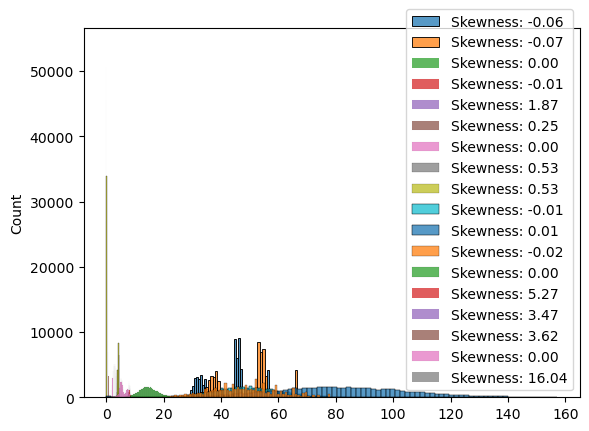

In [169]:
import pandas as pd

import seaborn as sns

from scipy import stats

from scipy.stats import yeojohnson

# Load CSV file as dataframe from local machine
def no_null_table():
    with open('../../file_saves/null_removed_table.csv', 'r') as file:
        saved_loan_payments_table = pd.read_csv(file)
    return saved_loan_payments_table

clean_table = no_null_table()

# Assess skewness of dataframe.
get_info = DataFrameInfo(clean_table)
skew_table = get_info.column_skew()

# Transform columns with >1 skew.
def yeojohnson_transform():
    for column, skew in skew_table.items():
        if skew > 1:  
            yeojohnson_sample = clean_table[column]
            yeojohnson_transform = stats.yeojohnson(yeojohnson_sample)
            yeojohnson_data= pd.Series(yeojohnson_transform[0])
            clean_table[column] = yeojohnson_data
            plot=sns.histplot(yeojohnson_data,label="Skewness: %.2f"%(yeojohnson_data.skew()) )
            plot.legend()
    return clean_table

transformed_table = yeojohnson_transform()

print(transformed_table)

# Assess skewness of transformed dataframe.
transform_info = DataFrameInfo(transformed_table)
reduced_skew = transform_info.column_skew()

# Check skewness after transformation and save new table.

In [170]:
print(f'Before transformation:\n{skew_table}.\n After transformation:\n{reduced_skew}')

transformed_table.to_csv('../../file_saves/transformed_table.csv', index=False)

Before transformation:
id                             2.370227
member_id                      2.205248
loan_amount                    0.804922
funded_amount                  0.845298
funded_amount_inv              0.813376
term                           1.147782
int_rate                       0.398977
instalment                     0.996572
annual_inc                     8.717500
dti                            0.189101
delinq_2yrs                    5.376385
inq_last_6mths                 3.253523
open_accounts                  1.059184
total_accounts                 0.779040
out_prncp                      2.354051
out_prncp_inv                  2.354471
total_payment                  1.269875
total_payment_inv              1.257870
total_rec_prncp                1.262679
total_rec_int                  2.204585
total_rec_late_fee            13.174553
recoveries                    14.389299
collection_recovery_fee       27.807754
last_payment_amount            2.497220
collections_12_mt

# Remove outliers.